<a href="https://colab.research.google.com/github/wimblerobotics/nadie/blob/master/O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See 

* [Tutorial DarknetToColab.ipynb](https://colab.research.google.com/drive/1lTGZsfMaGUpBG4inDIQwIJVW476ibXk_#scrollTo=op1iEE3bOVR6)
* [Yolo Mark](https://github.com/AlexeyAB/Yolo_mark)

In [ ]:
# DO THIS ALWAYS
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')
!ln -s "/content/gdrive/My Drive/darknet/" /dn
#!sudo apt-get install tree
#!tree /dn

# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version



In [ ]:

# DO THIS ONLY WHEN SETTING UP FIRST TIME
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xf /dn/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tar -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2



In [ ]:
# DO THIS ONLY WHEN SETTING UP FIRST TIME
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!echo "Cloning and building darknet into folder: `pwd`"
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# I have a branch where I have done the changes commented above
!git checkout feature/google-colab

#Compile Darknet
!make

!cp -r /content/darknet /dn/compiled_darknet
!chmod +x /dn/compiled_darknet/darknet


In [13]:
### TRAIN ###
!/dn/compiled_darknet/darknet detector train "/dn/O/obj.data" "/dn/O/yolo-obj.cfg" "/dn/yolov4.conv.137" -dont_show 

yolo-obj
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

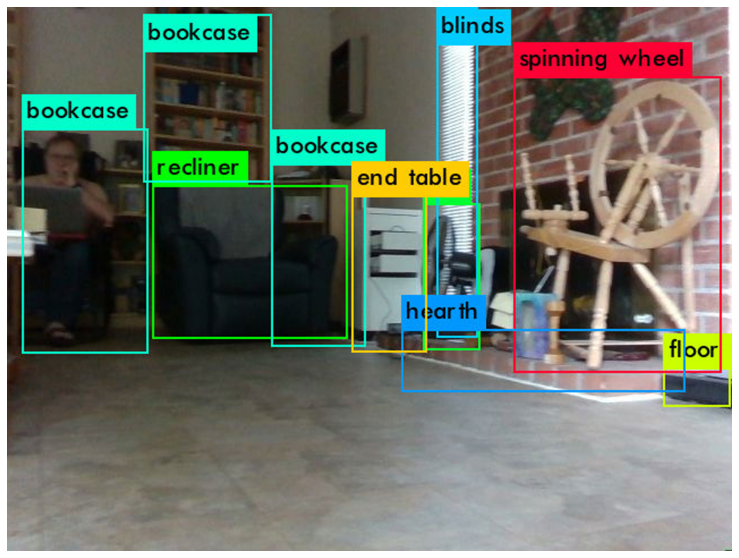

In [12]:
### TEST TRAINING ###
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

!/dn/compiled_darknet/darknet detector test "/dn/O/obj.data" "/dn/O/yolo-obj.cfg" "/dn/O/backup/yolo-obj_2000.weights" "/dn/O/ai_images/frame0118.jpg" -dont-show
# Show the result using the helper imShow()
imShow('predictions.jpg')

In [ ]:
### MISC SNIPPETS ###
#!ls /dn/O/ai_images/
#!mv /dn/O/ai_images/*.xml /dn/O/ai_annotations/
#!cat /dn/O/obj.data
#!cat /dn/O/train.txt
#!cp /dn/yolo-obj.cfg /dn/O/yolo-obj.cfg
#!ls -l "/dn/O/yolo-obj.cfg"
#!ls -l /dn/O/backup/yolo-obj_last.weights 
#!ls -l /dn/O/ai_images/frame0118.jpg
#!cat /dn/O/yolo-obj.cfg
!grep -r coco /dn/O/*


^C
